# Netflix Data Cleaning, Analysis, and Visualization
This project uses Netflix data to perform data cleaning, exploratory data analysis (EDA), and visualization. The dataset contains details about TV Shows and Movies from 1925 to 2021.

Importing Required Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Load the dataset

In [3]:

data = pd.read_csv(r"C:\Users\PUSHPALATA MALI\Downloads\netflix1.csv")
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Data Cleaning

In [4]:

# Check for missing values
print(data.isnull().sum())

# Drop duplicates
data.drop_duplicates(inplace=True)

# Drop rows missing critical info
data.dropna(subset=['director', 'country'], inplace=True)

# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Confirm data types
print(data.dtypes)


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


# Exploratory Data Analysis (EDA)

1.Content Type Distribution (Movies vs. TV Shows)

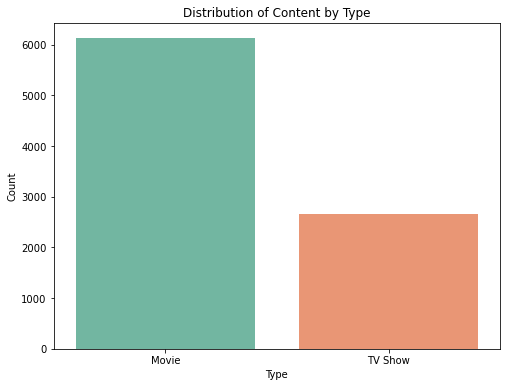

In [5]:

type_counts = data['type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


2. Most Common Genres

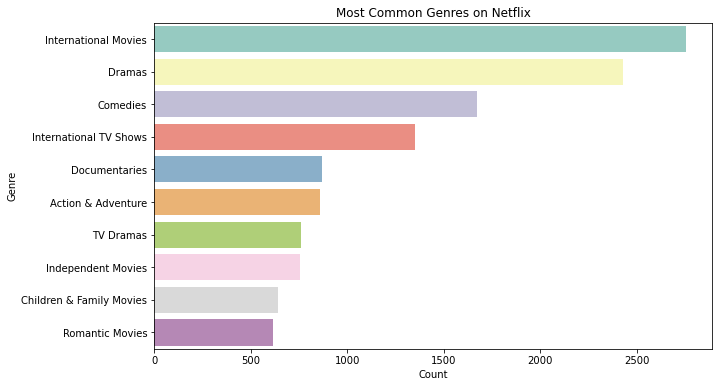

In [6]:

data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


3. Content Added Over Time

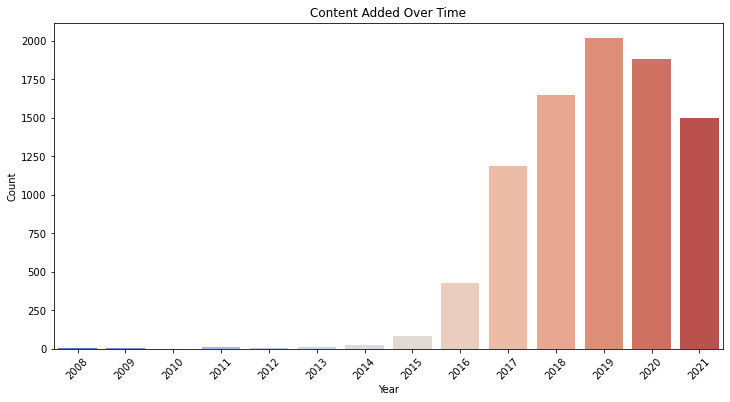

In [7]:

data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


4. Top 10 Directors with the Most Titles

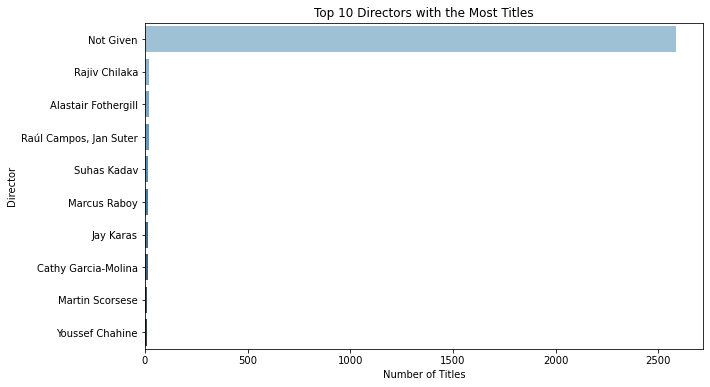

In [8]:

top_directors = data['director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


5. Word Cloud of Movie Titles

In [9]:
!pip uninstall pillow -y




Found existing installation: pillow 11.2.1
Uninstalling pillow-11.2.1:
  Successfully uninstalled pillow-11.2.1


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\PUSHPALATA MALI\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "C:\Users\PUSHPALATA MALI\anaconda3\lib\site-packages\pip\_internal\commands\uninstall.py", line 97, in run
    uninstall_pathset.commit()
  File "C:\Users\PUSHPALATA MALI\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 436, in commit
    self._moved_paths.commit()
  File "C:\Users\PUSHPALATA MALI\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 287, in commit
    save_dir.cleanup()
  File "C:\Users\PUSHPALATA MALI\anaconda3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 184, in cleanup
    rmtree(self._path)
  File "C:\Users\PUSHPALATA MALI\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 326, in wrapped_f
    return self(f, *args, **kw)
  File "C:\Users\PUSHPALATA MALI\anaconda3\lib\site-packages\pip\_ve

In [10]:
!pip install pillow --no-cache-dir --force-reinstall


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 4.44.1 requires pillow<11.0,>=8.0, but you have pillow 11.2.1 which is incompatible.


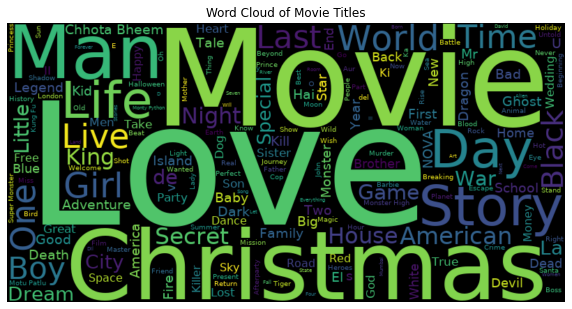

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
import matplotlib

font_path = os.path.join(matplotlib.get_data_path(), "fonts/ttf/DejaVuSans.ttf")
movie_titles = data[data['type'] == 'Movie']['title'].dropna()
text = ' '.join(movie_titles)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    font_path=font_path
).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Titles")
plt.show()



## Conclusion and Insights

- Cleaned the Netflix dataset by removing nulls and duplicates.
- Visualized content distribution, popular genres, and release trends.
- Highlighted top contributing directors and countries.
- Created a word cloud of movie titles for fun visualization.
